In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the stoich_45 feature set

- 9 elemental properties (i.e., atomic number, group number, period number, electronegativity, electron affinity, melting temperature, boiling temperature, density, and ionization energy), and
- 5 statistical quantities (i.e., standard mean, geometric mean, standard deviation, maximum value, and minimum value) of elemental properties

- do not encode any information about the structural properties, only chemical composition of each material


In [3]:
# Read the csv file for features for QMOF dataset
# stoich45
#df_fp = pd.read_csv('../data/QMOF/qmof_database/qmof_database/relaxed_structures_fingerprints/stoich45_fingerprints.csv', sep=',')
df_fp = pd.read_csv('relaxed_structures_fingerprints/stoich45_fingerprints.csv', sep=',')
df_fp

,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,density_mean,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min
0,qmof-0000295,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,991.514712,4.182460,1912.665927,8960.0,0.0899,1233.652000,1223.402105,146.933016,1402.3,745.5
1,qmof-00019ff,6.160494,3.696834,7.475816,35.0,1.0,9.790123,5.722078,6.461120,17.0,...,1268.620262,23.314272,1455.767729,8900.0,0.0899,1205.481481,1198.057939,131.447336,1402.3,760.4
2,qmof-0001b0d,4.982301,3.323008,4.774531,30.0,1.0,9.318584,5.295894,6.452365,16.0,...,1285.340051,21.643255,1546.598997,8900.0,0.0899,1193.978761,1186.951791,126.964974,1402.3,760.4
3,qmof-0003ae4,5.125000,3.915946,2.847696,8.0,1.0,9.875000,5.471130,6.918047,16.0,...,632.433350,9.465604,955.356975,2260.0,0.0899,1157.362500,1115.508932,259.170918,1313.9,520.2
4,qmof-000512e,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,721.626295,15.205775,1023.803409,2260.0,0.0899,1218.510000,1187.405501,219.174061,1402.3,418.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,4.852941,3.061308,5.047611,29.0,1.0,8.676471,4.605269,6.676211,16.0,...,1094.694428,8.472108,1743.749437,8960.0,0.0899,1216.669118,1207.703553,139.305687,1402.3,745.5
20370,qmof-fff4e91,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,1293.323270,19.449685,1662.683156,7140.0,0.0899,1196.652174,1189.732816,126.320937,1313.9,906.4
20371,qmof-fffa2d9,9.214286,5.231450,10.631346,56.0,1.0,11.000000,6.622890,6.881653,17.0,...,610.714507,4.941293,1077.738281,3510.0,0.0899,1222.228571,1205.732522,164.349362,1313.9,502.9
20372,qmof-fffd0e2,6.423077,3.917995,7.150433,35.0,1.0,10.000000,6.002496,6.330634,17.0,...,1291.114698,21.226806,1625.387651,7140.0,0.0899,1209.240385,1201.115960,138.735819,1402.3,906.4


### Load the processed dataset for HSE06 DFT level

In [4]:
# Read the csv file for specific DFT level for QMOF dataset
#df_hse06 = pd.read_csv('df_hse06.csv', sep=',')
df_hse06 = pd.read_csv('train_hse06.csv', sep=',')
df_hse06

,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,qmof_id
0,HSE06,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880,qmof-755b963
1,HSE06,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968,qmof-431c61c
2,HSE06,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082,qmof-0954b37
3,HSE06,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244,qmof-6994eb7
4,HSE06,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068,qmof-1eea8fc
...,...,...,...,...,...,...,...,...,...,...,...
8643,HSE06,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932,qmof-46a3716
8644,HSE06,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574,qmof-b2fb769
8645,HSE06,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981,qmof-4a920a2
8646,HSE06,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985,qmof-0f4d4bb


### Import features from the features dataset to DFT dataset by matching qmof_id in each

In [5]:
# Merge the DataFrames on the matching columns
df_hse06_stoich45 = pd.merge(df_fp, df_hse06, left_on='MOF', right_on='qmof_id', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_stoich45.drop(columns=['qmof_id'], inplace=True)

# Display the combined DataFrame
print(df_hse06_stoich45.head())

# Save the combined DataFrame to a new CSV file
#df_hse06_stoich45.to_csv('df_hse06_combined.csv', index=False)

            MOF  atomic_num_mean  atomic_num_geometric_mean  \
0  qmof-755b963         5.435897                   3.685384   
1  qmof-431c61c         4.746269                   3.268988   
2  qmof-0954b37         5.477612                   3.613829   
3  qmof-6994eb7         7.114286                   4.942821   
4  qmof-1eea8fc         4.769231                   2.906336   

   atomic_num_standard_deviation  atomic_num_max  atomic_num_min  \
0                       4.892668            30.0             1.0   
1                       4.097117            30.0             1.0   
2                       7.107613            59.0             1.0   
3                       5.770721            29.0             1.0   
4                       6.497382            47.0             1.0   

   group_num_mean  group_num_geometric_mean  group_num_standard_deviation  \
0       10.102564                  5.975021                      6.511508   
1        9.373134                  5.307604               

Dataset with stoich_45 features:

In [6]:
df_hse06_stoich45

,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume
0,qmof-755b963,5.435897,3.685384,4.892668,30.0,1.0,10.102564,5.975021,6.511508,17.0,...,HSE06,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880
1,qmof-431c61c,4.746269,3.268988,4.097117,30.0,1.0,9.373134,5.307604,6.491868,16.0,...,HSE06,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968
2,qmof-0954b37,5.477612,3.613829,7.107613,59.0,1.0,10.134328,6.043493,6.448176,19.0,...,HSE06,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082
3,qmof-6994eb7,7.114286,4.942821,5.770721,29.0,1.0,11.628571,7.955079,5.923733,17.0,...,HSE06,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244
4,qmof-1eea8fc,4.769231,2.906336,6.497382,47.0,1.0,8.384615,4.393251,6.613372,16.0,...,HSE06,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,qmof-46a3716,5.722222,3.714647,5.747517,28.0,1.0,9.611111,5.753521,6.223958,15.0,...,HSE06,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932
8644,qmof-b2fb769,5.651163,3.799867,4.969131,29.0,1.0,10.069767,6.045240,6.359009,16.0,...,HSE06,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574
8645,qmof-4a920a2,5.914286,4.491859,4.066388,25.0,1.0,11.342857,7.779733,5.786402,15.0,...,HSE06,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981
8646,qmof-0f4d4bb,4.893617,3.338422,3.668347,20.0,1.0,9.276596,5.059334,6.812698,16.0,...,HSE06,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985


Distribution of the target – band gap:

/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


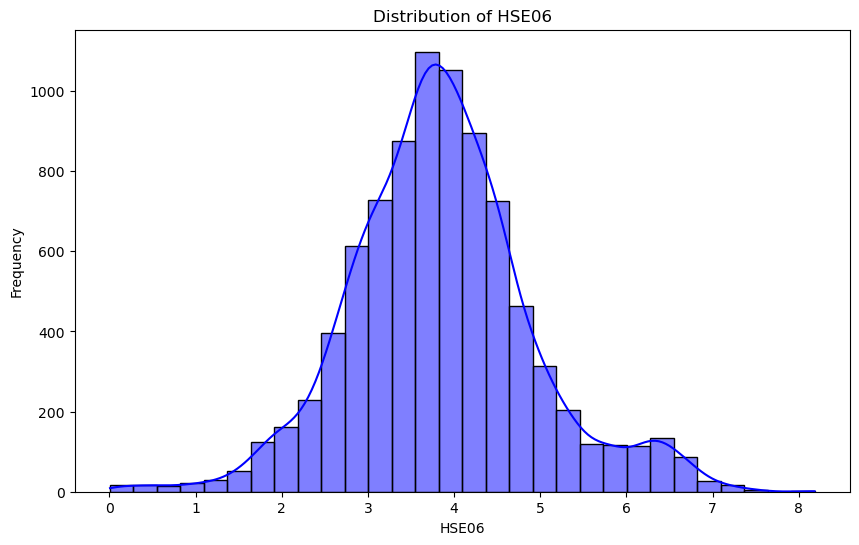

In [7]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_hse06_stoich45['outputs.hse06.bandgap'], bins=30, kde=True, color='blue')
plt.title('Distribution of HSE06')
plt.xlabel('HSE06')
plt.ylabel('Frequency')
plt.show()

## 1. Pariwise correlation between target and other features

- shows the linear relationships between pairs of features.
- to identify features that are highly correlated with each other, which might indicate redundancy.

outputs.hse06.bandgap                   1.000000
electronegativity_standard_deviation    0.376143
group_num_standard_deviation            0.330665
ionization_energy_mean                  0.285393
ionization_energy_geometric_mean        0.228640
electronegativity_max                   0.132531
electron_affinity_min                   0.130686
electronegativity_mean                  0.122070
group_num_max                           0.090010
ionization_energy_standard_deviation    0.080480
period_num_standard_deviation           0.053084
period_num_max                          0.046334
info.density                            0.043049
electronegativity_geometric_mean        0.028644
atomic_num_standard_deviation           0.027735
atomic_num_max                          0.020707
info.natoms                            -0.012076
info.pld                               -0.050483
atomic_num_mean                        -0.058659
electron_affinity_geometric_mean       -0.061096
info.lcd            

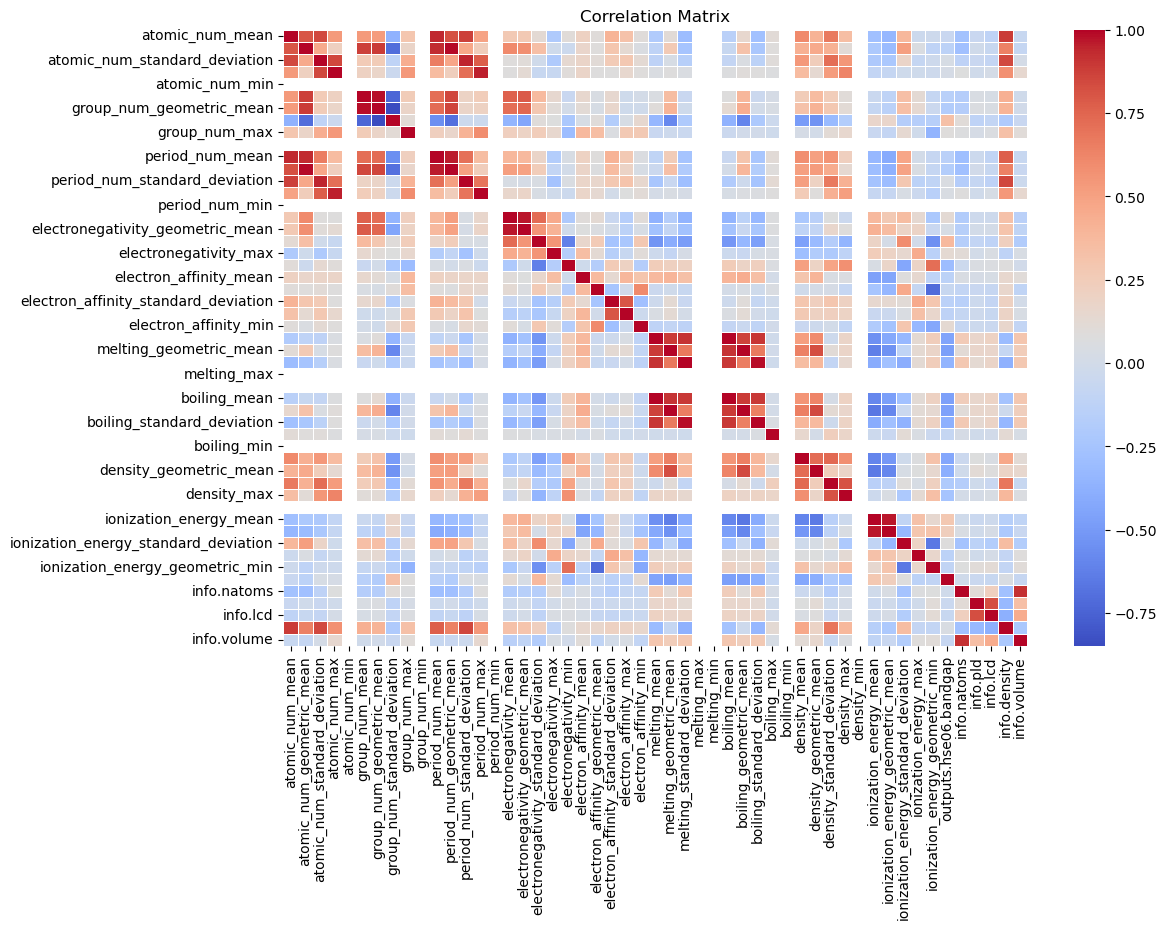

In [8]:
# Feature correlation with target variable for numerical features, ignore the 'MOF' column
# Filter the DataFrame to include only numerical columns
df_numerical = df_hse06_stoich45.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Get the correlation of each numerical feature with the target variable 'outputs.hse06.bandgap'
target_corr = corr_matrix['outputs.hse06.bandgap'].sort_values(ascending=False)

# Display the correlations with the target variable
print(target_corr)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Process dataset further to keep only target – band gap and 45 features (dropping non-numerical and info columns):

In [9]:
# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_stoich45.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_stoich45.drop(columns=df_hse06_stoich45.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_stoich45.columns)
print('number of columns:', len(df_hse06_stoich45.columns))

Index(['atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max', 'group_num_min',
       'period_num_mean', 'period_num_geometric_mean',
       'period_num_standard_deviation', 'period_num_max', 'period_num_min',
       'electronegativity_mean', 'electronegativity_geometric_mean',
       'electronegativity_standard_deviation', 'electronegativity_max',
       'electronegativity_min', 'electron_affinity_mean',
       'electron_affinity_geometric_mean',
       'electron_affinity_standard_deviation', 'electron_affinity_max',
       'electron_affinity_min', 'melting_mean', 'melting_geometric_mean',
       'melting_standard_deviation', 'melting_max', 'melting_min',
       'boiling_mean', 'boiling_geometric_mean', 'boiling_standard_deviation',
       'boiling_max', 'boiling_min', 'density_mean', 'density_geometric_mean',

## 2. Calculate variance and identify low variance features below a specified threshold

- to calculate the variance (how much a feature (or a combination of features) varies or spreads out across the dataset) of each feature and identify low variance features.
- higher variance means that a feature’s values differ a lot from sample to sample — it carries information that distinguishes data points.
- low variance means that a feature’s values are almost constant, and thus less informative for a model because it doesn’t help differentiate between instances.
- features with very low variance might not provide much information to the model and can be considered for removal.
- the correlation matrix is then used to further analyze the relationships between the remaining features.


Variances of features:
atomic_num_mean                         3.093481e+00
atomic_num_geometric_mean               6.729784e-01
atomic_num_standard_deviation           1.405784e+01
atomic_num_max                          3.235621e+02
atomic_num_min                          0.000000e+00
group_num_mean                          1.331092e+00
group_num_geometric_mean                1.723509e+00
group_num_standard_deviation            1.603812e-01
group_num_max                           1.115576e+00
group_num_min                           0.000000e+00
period_num_mean                         2.263333e-02
period_num_geometric_mean               1.538343e-02
period_num_standard_deviation           3.463432e-02
period_num_max                          8.302810e-01
period_num_min                          0.000000e+00
electronegativity_mean                  9.187473e-03
electronegativity_geometric_mean        7.006561e-03
electronegativity_standard_deviation    1.155644e-02
electronegativity_max  

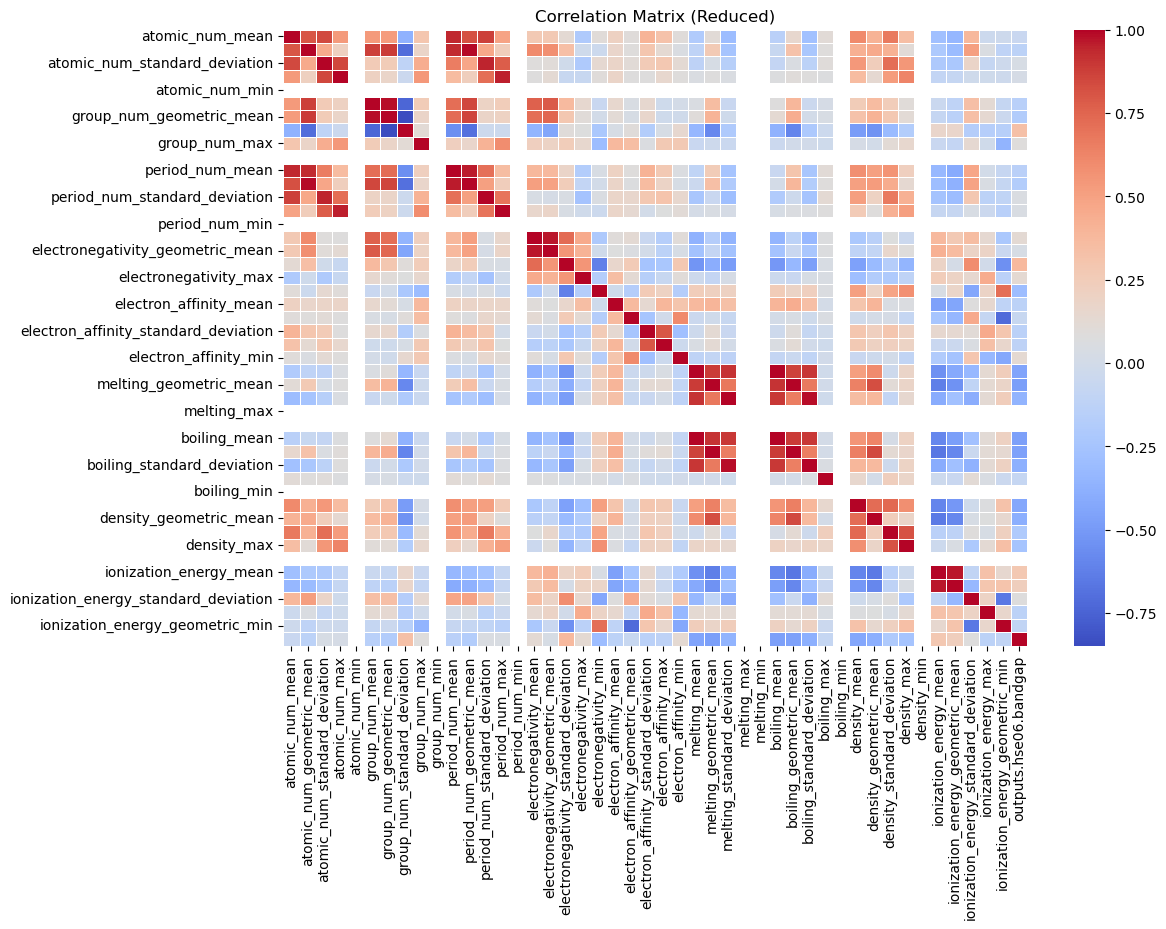

In [10]:
# Calculate the variance of each feature
variances = df_hse06_stoich45.var()

# Display the variances
print("Variances of features:")
print(variances)

# Identify low variance features (e.g., variance below a threshold)
threshold = 0.01  # adjust this threshold based on the dataset
low_variance_features = variances[variances < threshold].index

print("\nLow variance features:")
print(low_variance_features)

# Drop low variance features from the DataFrame
df_hse06_stoich45_reduced = df_hse06_stoich45.drop(columns=low_variance_features)

# Calculate the correlation matrix for the reduced DataFrame
corr_matrix_reduced = df_hse06_stoich45.corr()

# Plot the correlation matrix for the reduced DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_reduced, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix (Reduced)')
plt.show()

## 3. Feature importance by Mean Decrease in Impurity (MDI) method in Random Forest model

- a measure of feature importance used in decision tree-based models, such as Random Forests.
- quantifies the importance of a feature by calculating the total reduction in impurity (e.g., Gini impurity or entropy) that the feature brings to the model across all the trees in the forest.
- features with higher MDI values are considered more important because they contribute more to reducing impurity in the dataset. These features are more influential in making accurate predictions.

In [11]:
#  Mean decrease in impurity using the random forest model for feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Drop the target variable from the DataFrame
X = df_hse06_stoich45.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45['outputs.hse06.bandgap']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get the feature importances from the model
feature_importances = rf.feature_importances_

# Get the column names from the DataFrame
column_names = X.columns

# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({'feature': column_names, 'importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the DataFrame
print(feature_importances_df)



                                 feature  importance
26                melting_geometric_mean    0.207874
7           group_num_standard_deviation    0.068119
38                           density_max    0.064843
19                 electronegativity_min    0.063030
17  electronegativity_standard_deviation    0.034143
22  electron_affinity_standard_deviation    0.031467
37            density_standard_deviation    0.030817
20                electron_affinity_mean    0.030656
36                density_geometric_mean    0.030480
31                boiling_geometric_mean    0.029961
42  ionization_energy_standard_deviation    0.027136
35                          density_mean    0.026981
3                         atomic_num_max    0.026500
44       ionization_energy_geometric_min    0.025443
2          atomic_num_standard_deviation    0.020974
16      electronegativity_geometric_mean    0.019541
12         period_num_standard_deviation    0.019018
30                          boiling_mean    0.

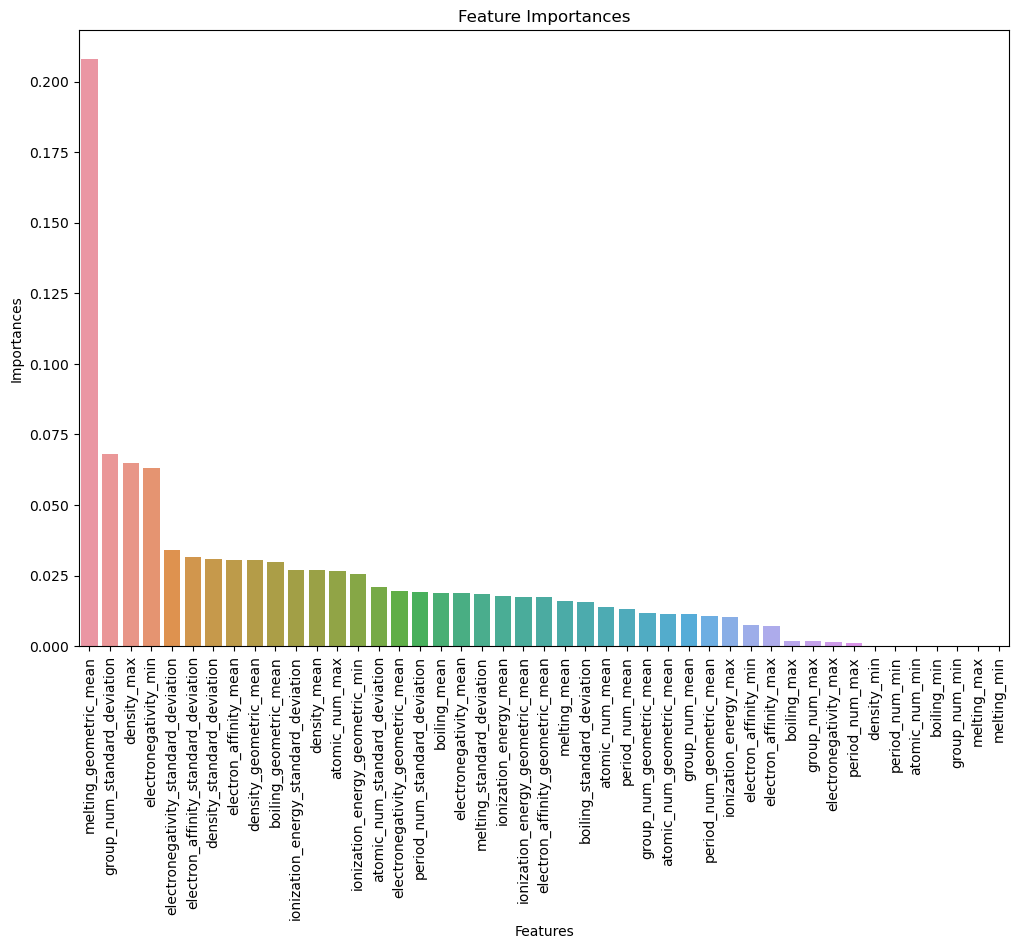

In [12]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='importance', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.xticks(rotation=90, fontsize=10)
plt.show()

## 4. Feature importance by permutation importance

- calculates feature importances using permutation importance with the same Random Forest model.
- calculate feature importances by measuring the change in model performance when each feature is randomly shuffled.
- provides an additional measure of variability (standard deviations) for the importances.

In [13]:
# Permutation importance using the random forest model for feature importance

from sklearn.inspection import permutation_importance


# Calculate the mean decrease in impurity for each feature
result = permutation_importance(rf, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=30, random_state=42)

# Get the feature importances and standard deviations
importances = result.importances_mean
std = result.importances_std

# Ensure the feature names match the columns in X_test
features = X_test.columns

# Create a DataFrame with the feature importances
importances_df = pd.DataFrame({'feature': features, 'importance': importances, 'std': std})

# Sort the DataFrame by feature importance in descending order
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Display the DataFrame
print(importances_df)


                                 feature  importance       std
26                melting_geometric_mean    0.285320  0.018506
38                           density_max    0.123618  0.012032
3                         atomic_num_max    0.101433  0.011629
19                 electronegativity_min    0.100362  0.008281
43                 ionization_energy_max    0.030758  0.004816
44       ionization_energy_geometric_min    0.029880  0.003426
35                          density_mean    0.026737  0.003755
7           group_num_standard_deviation    0.023421  0.003563
31                boiling_geometric_mean    0.019365  0.003457
36                density_geometric_mean    0.016513  0.002761
17  electronegativity_standard_deviation    0.016476  0.003025
20                electron_affinity_mean    0.015701  0.002702
22  electron_affinity_standard_deviation    0.011311  0.002544
27            melting_standard_deviation    0.010044  0.001928
37            density_standard_deviation    0.009459  0

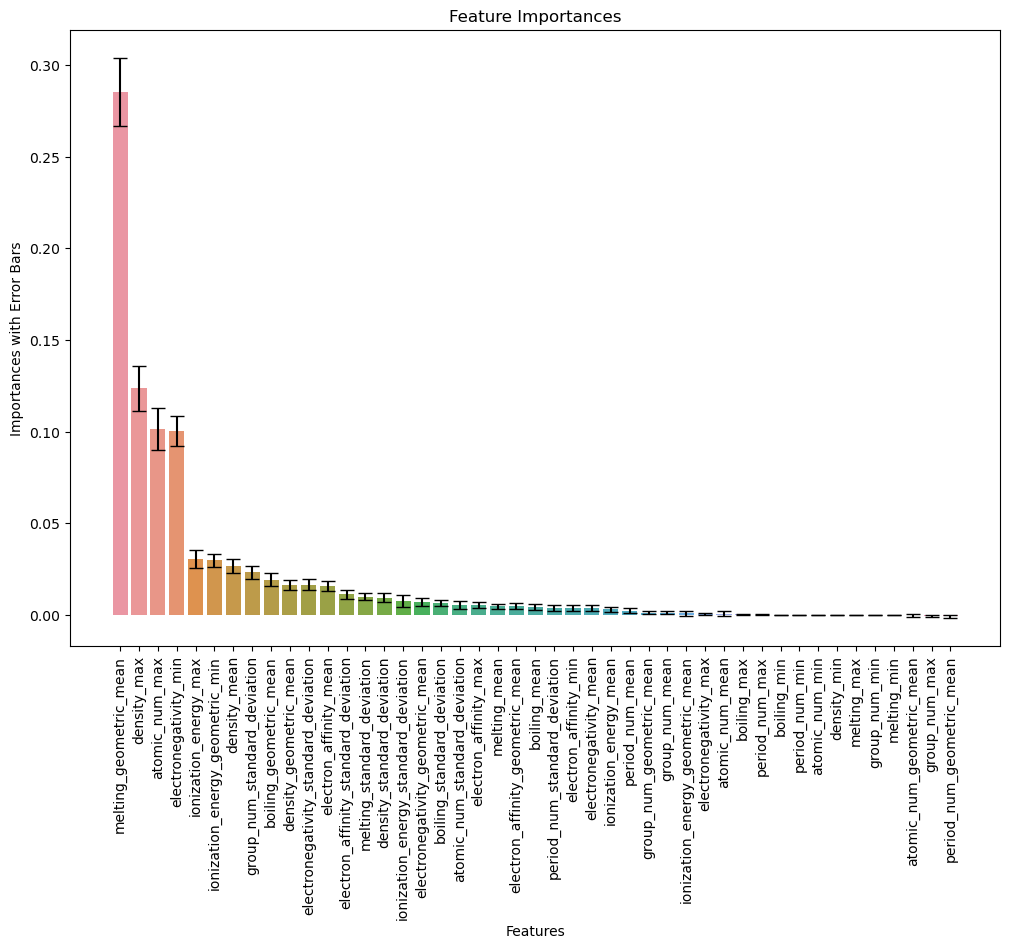

In [14]:
# Plot the feature importances with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='importance', data=importances_df, capsize=5)
plt.errorbar(importances_df['feature'], importances_df['importance'], yerr=importances_df['std'].values, fmt='none', c='black', capsize=5)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importances with Error Bars')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [15]:
#plt.rcParams.update({'font.size': 22})
#plt.figure(figsize=(40, 10))

# Create a Series for the feature importances
#forest_importances = pd.Series(importances, index=[f[2:] for f in importances_df['feature']])

# Create a DataFrame to combine importances and standard deviations
#importances_df = pd.DataFrame({'importance': forest_importances, 'std': std})

# Sort the DataFrame by standard deviation
#importances_df = importances_df.sort_values(by='std', ascending=False)

# Plot the feature importances with error bars
#ax = importances_df['importance'].plot.bar(yerr=importances_df['std'], capsize=5)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#ax.set_xlabel("Features")
#plt.xticks(rotation=90)
#plt.show()

## 5. SHAP


```
# SHAP values for feature importance
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

# Plot the SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title('SHAP Summary Plot')
plt.show()

# Plot the SHAP summary plot for the entire dataset
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X, plot_type="bar")
plt.title('SHAP Summary Plot (Entire Dataset)')
plt.show()

```

## 6. PCA

- dimensionality reduction technique that transforms the original features into a new set of uncorrelated features called principal components while retaining most of the important information (variance).
- principal components are linear combinations of the original features and are ordered such that the first few retain most of the variation present in the original dataset.

- can visualize patterns, clusters, and relationships in the data that may not be apparent in the original high-dimensional space.

- not ideal for feature interpretability, since components are linear combinations of original features.
- but useful for detecting high redundancy, e.g., if only a few components explain 95% of variance, may have too many features.

- what PCA Tells About Features:
  - variance explained: tells you how much of the total variance in the data is captured by each principal component. The first principal component (PC1) captures the most variance, followed by the second principal component (PC2), and so on.
  - feature contributions:  provides information about the contribution of each original feature to the principal components. 

In [16]:
# Print NaN values in the DataFrame
print(df_hse06_stoich45.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich45_for_pca = df_hse06_stoich45.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_stoich45.shape[0] - df_hse06_stoich45_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich45_for_pca.shape)

df_hse06_stoich45_for_pca.columns

atomic_num_mean                           0
atomic_num_geometric_mean                 0
atomic_num_standard_deviation             0
atomic_num_max                            0
atomic_num_min                            0
group_num_mean                            0
group_num_geometric_mean                  0
group_num_standard_deviation              0
group_num_max                             0
group_num_min                             0
period_num_mean                           0
period_num_geometric_mean                 0
period_num_standard_deviation             0
period_num_max                            0
period_num_min                            0
electronegativity_mean                  174
electronegativity_geometric_mean        174
electronegativity_standard_deviation    174
electronegativity_max                   174
electronegativity_min                   174
electron_affinity_mean                  120
electron_affinity_geometric_mean        120
electron_affinity_standard_devia

Index(['atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max', 'group_num_min',
       'period_num_mean', 'period_num_geometric_mean',
       'period_num_standard_deviation', 'period_num_max', 'period_num_min',
       'electronegativity_mean', 'electronegativity_geometric_mean',
       'electronegativity_standard_deviation', 'electronegativity_max',
       'electronegativity_min', 'electron_affinity_mean',
       'electron_affinity_geometric_mean',
       'electron_affinity_standard_deviation', 'electron_affinity_max',
       'electron_affinity_min', 'melting_mean', 'melting_geometric_mean',
       'melting_standard_deviation', 'melting_max', 'melting_min',
       'boiling_mean', 'boiling_geometric_mean', 'boiling_standard_deviation',
       'boiling_max', 'boiling_min', 'density_mean', 'density_geometric_mean',

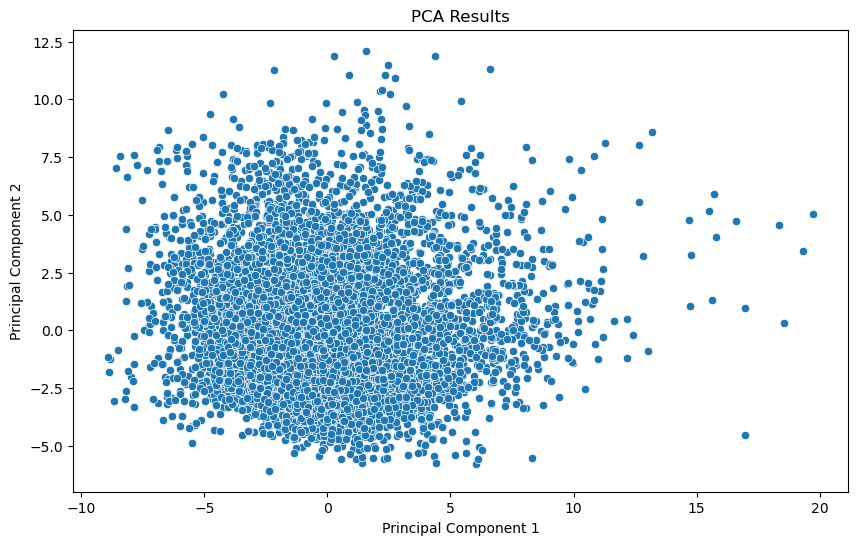

In [17]:
# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X = df_hse06_stoich45_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [18]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Loadings (coefficients of the original features in the principal components)
loadings = pca.components_
print("Loadings:", loadings)

Explained variance ratio: [0.25724212 0.2029241 ]
Loadings: [[ 2.49514175e-01  2.43294703e-01  2.06755896e-01  1.59948260e-01
   6.43569231e-24  2.07819575e-01  2.19167806e-01 -2.15173856e-01
   7.43275403e-02 -1.08487667e-27  2.66806489e-01  2.60627183e-01
   1.88581519e-01  1.43164542e-01 -0.00000000e+00  5.07532965e-02
   7.13977042e-02 -4.84961353e-02 -5.21214171e-02  8.63607567e-02
   1.30397365e-01  2.98442418e-02  1.14138875e-01  9.87540287e-02
   7.63016465e-03  1.30521851e-01  2.15694997e-01  7.54111633e-02
  -0.00000000e+00 -0.00000000e+00  1.45941594e-01  2.25214261e-01
   8.14737049e-02  4.00251119e-02 -0.00000000e+00  2.68809318e-01
   2.44984006e-01  2.03204513e-01  1.48188385e-01 -0.00000000e+00
  -1.74422617e-01 -1.69891316e-01  6.71573460e-02  3.08130943e-02
   3.58641003e-02]
 [ 1.67927354e-01  1.91917836e-01  1.10112949e-01  4.87594651e-02
   2.89495857e-23  1.55505604e-01  1.35883100e-01 -5.67152494e-03
   1.00874535e-01  1.07257057e-26  1.67720792e-01  1.63460004e-

# Edits by Simran

PCA with more components

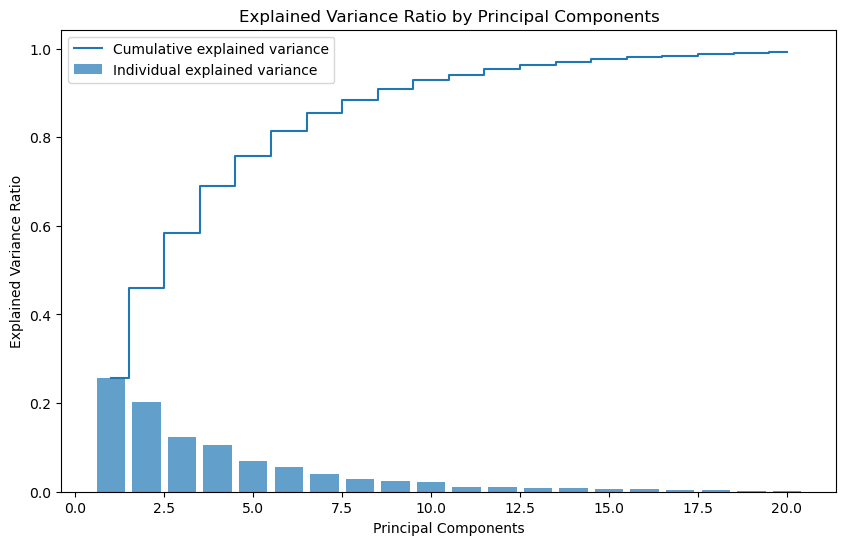

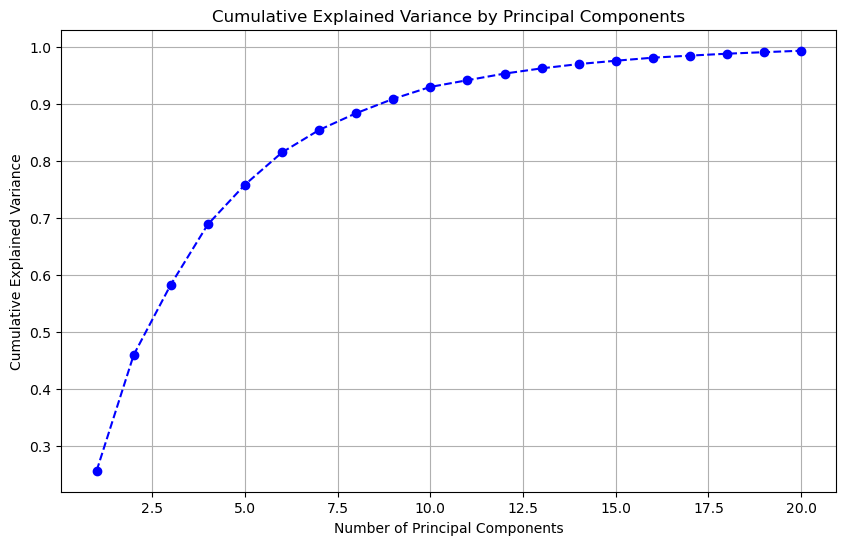

In [19]:
# Perform PCA with more components
n = 20
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

I am keeping 6 PCs

In [20]:
n_components = 6  # Choose based on the plot
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)  # X is your original feature matrix
X_pca_final.shape

(8354, 6)

# Stoich45 + Sine Coloumb Matrix

In [21]:
df_scm = pd.read_csv('relaxed_structures_fingerprints/sine_matrix_fingerprints.csv', sep=',')
df_scm

,MOF,sine coulomb matrix eig 0,sine coulomb matrix eig 1,sine coulomb matrix eig 2,sine coulomb matrix eig 3,sine coulomb matrix eig 4,sine coulomb matrix eig 5,sine coulomb matrix eig 6,sine coulomb matrix eig 7,sine coulomb matrix eig 8,...,sine coulomb matrix eig 490,sine coulomb matrix eig 491,sine coulomb matrix eig 492,sine coulomb matrix eig 493,sine coulomb matrix eig 494,sine coulomb matrix eig 495,sine coulomb matrix eig 496,sine coulomb matrix eig 497,sine coulomb matrix eig 498,sine coulomb matrix eig 499
0,qmof-0000295,1691.427298,1560.244952,137.059900,85.726398,76.930876,74.818457,66.357818,63.019537,60.947984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,qmof-00019ff,2907.030536,1364.645982,2521.150564,2370.534598,2383.323768,179.706962,93.568952,91.120197,89.876367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qmof-0001b0d,1802.469471,1732.081967,1363.264016,178.118907,97.352536,94.760572,89.695991,87.103939,83.213032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,qmof-0003ae4,139.946646,83.478306,80.230482,75.994663,74.484638,71.567389,69.691548,68.374646,66.877563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,qmof-000512e,617.233971,564.388755,165.979086,0.404738,0.325928,91.008065,86.933901,80.051556,79.421213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,1796.478044,1694.734871,1506.136068,1514.231978,212.086602,121.172004,108.586065,107.346230,100.464696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20370,qmof-fff4e91,1856.582131,1663.730055,142.494828,84.710420,79.326007,77.989694,69.592844,66.939837,67.815411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20371,qmof-fffa2d9,8063.154322,7646.379145,677.055769,492.110722,478.782339,473.324184,390.052595,397.342907,399.979903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20372,qmof-fffd0e2,2654.146627,2482.868806,2021.273651,1790.679016,1648.558929,1613.124911,504.693455,440.876141,448.233202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_hse06_stoich45

,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,group_num_min,...,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min,outputs.hse06.bandgap
0,5.435897,3.685384,4.892668,30.0,1.0,10.102564,5.975021,6.511508,17.0,1.0,...,14.609889,1472.787091,7140.0,0.0899,1242.297436,1230.382793,176.391285,1681.0,906.4,4.988289
1,4.746269,3.268988,4.097117,30.0,1.0,9.373134,5.307604,6.491868,16.0,1.0,...,15.492118,1340.240936,7140.0,0.0899,1211.885075,1205.248668,125.737828,1402.3,906.4,3.196302
2,5.477612,3.613829,7.107613,59.0,1.0,10.134328,6.043493,6.448176,19.0,1.0,...,24.602673,1305.210435,6640.0,0.0899,1189.528358,1179.733477,138.723910,1313.9,527.0,3.617418
3,7.114286,4.942821,5.770721,29.0,1.0,11.628571,7.955079,5.923733,17.0,1.0,...,45.286607,1698.136217,8960.0,0.0899,1218.734286,1200.893137,213.381748,1681.0,745.5,3.220291
4,4.769231,2.906336,6.497382,47.0,1.0,8.384615,4.393251,6.613372,16.0,1.0,...,11.201458,1713.449386,10490.0,0.0899,1209.042308,1201.039588,133.111739,1402.3,731.0,2.436139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,5.722222,3.714647,5.747517,28.0,1.0,9.611111,5.753521,6.223958,15.0,1.0,...,15.674195,2025.522185,8908.0,0.0899,1213.138889,1199.508201,171.411605,1402.3,737.1,3.605205
8644,5.651163,3.799867,4.969131,29.0,1.0,10.069767,6.045240,6.359009,16.0,1.0,...,21.534939,1619.661124,8960.0,0.0899,1194.932558,1186.105426,140.057370,1402.3,745.5,3.776886
8645,5.914286,4.491859,4.066388,25.0,1.0,11.342857,7.779733,5.786402,15.0,1.0,...,4.877498,1492.613111,7470.0,0.0899,1289.905714,1278.165331,159.477558,1402.3,717.3,3.880014
8646,4.893617,3.338422,3.668347,20.0,1.0,9.276596,5.059334,6.812698,16.0,1.0,...,5.099770,1035.965918,2260.0,0.0899,1237.553191,1226.712844,146.275710,1402.3,589.8,4.301264


In [27]:
# Combine stoi45 and scm data
df_hse06_scm_stoich45 = pd.merge(df_hse06_stoich45, df_scm, left_on='MOF', right_on='MOF', how='right')
df_hse06_scm_stoich45

KeyError: 'MOF'